In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
import tensorflow as tf
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Constants
IMAGE_SIZE = 256
BATCH_SIZE = 32
SEED = 123
EPOCHS = 1
DATASET_PATH = "C:/Users/Timothy/breast cancer classification/hi"


# Load Training and Validation Datasets (before prefetch)
train_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="training",
    seed=SEED,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

# ✅ Get class names BEFORE prefetch
class_names = train_ds_raw.class_names
print("Class Names:", class_names)

# Compute class weights
label_list = []
for _, labels in train_ds_raw.unbatch():
    label_list.append(labels.numpy())

class_weights_array = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(label_list),
    y=label_list,
)
class_weights = {i: w for i, w in enumerate(class_weights_array)}
print("✅ Computed class weights:", class_weights)

# Prefetch after everything is ready
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds_raw.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 322 files belonging to 2 classes.
Using 258 files for training.
Found 322 files belonging to 2 classes.
Using 64 files for validation.
Class Names: ['Benign', 'Malignant']
✅ Computed class weights: {0: 1.075, 1: 0.9347826086956522}


In [3]:
# Load the raw dataset first (no prefetch yet)
train_ds_raw = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/Timothy/breast cancer classification/hi" ,
    validation_split=0.2,
    subset="training",
    seed=123,
    shuffle=True,
    image_size=(256, 256),
    batch_size=32,
)

# ✅ Get class names before prefetch
class_names = train_ds_raw.class_names
print("Class names:", class_names)

# Now prefetch if needed
train_ds = train_ds_raw.prefetch(buffer_size=tf.data.AUTOTUNE)


Found 322 files belonging to 2 classes.
Using 258 files for training.
Class names: ['Benign', 'Malignant']


In [4]:
for image_batch, labels_batch in train_ds_raw.take(1):  # or train_ds if you prefer
    print("Image batch shape:", image_batch.shape)
    print("Labels:", labels_batch.numpy())


Image batch shape: (32, 256, 256, 3)
Labels: [1 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0]


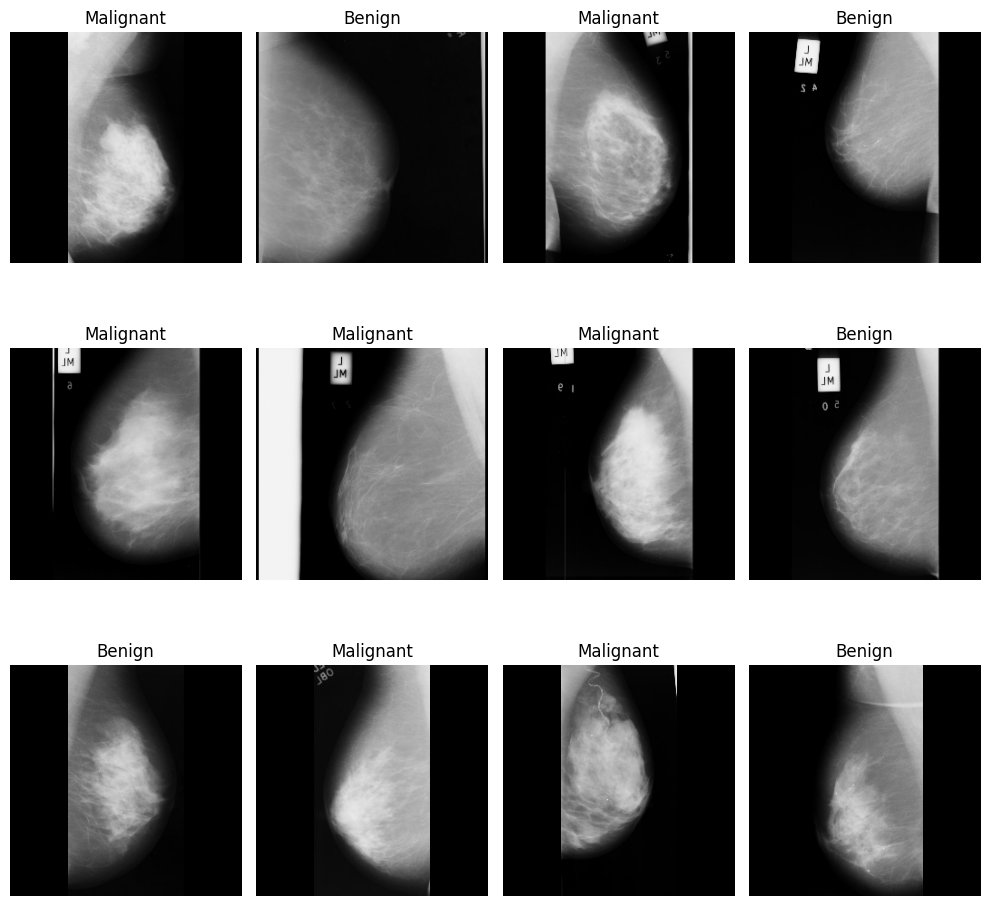

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_ds_raw.take(1):  # or train_ds if needed
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i].numpy()])
        plt.axis("off")
plt.tight_layout()
plt.show()


In [6]:
len(train_ds_raw)  # Or use `train_ds` if you're using the prefetched version


9

In [7]:
train_size = 0.8
dataset_size = len(train_ds_raw)
train_data_size = dataset_size * train_size
print(f"Training data size: {train_data_size}")


Training data size: 7.2


In [9]:
import tensorflow as tf

# Parameters
IMAGE_SIZE = 256
BATCH_SIZE = 32
SEED = 123

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
   "C:/Users/Timothy/breast cancer classification/hi",  # Make sure this path is correct
    validation_split=0.2,  # 20% for validation
    subset="training",  # Use this for the training subset
    seed=SEED,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

# Taking the first 54 batches
train_ds = dataset.take(54)

# Convert the dataset to a list and get the length (number of batches)
len_train_ds = len(list(train_ds))  
print(f"Number of batches in train_ds: {len_train_ds}")

# Calculate the number of images by multiplying with the batch size
num_images_in_train_ds = len_train_ds * BATCH_SIZE
print(f"Number of images in the training dataset: {num_images_in_train_ds}")


Found 322 files belonging to 2 classes.
Using 258 files for training.
Number of batches in train_ds: 9
Number of images in the training dataset: 288


In [10]:
test_ds = train_ds.skip(54)

# Convert the test_ds to a list and get the length (number of batches)
len_test_ds = len(list(test_ds))
print(f"Number of batches in test_ds: {len_test_ds}")

# Calculate the number of images in the test dataset
num_images_in_test_ds = len_test_ds * BATCH_SIZE
print(f"Number of images in the test dataset: {num_images_in_test_ds}")


Number of batches in test_ds: 0
Number of images in the test dataset: 0


In [11]:
val_size=0.1
len(dataset)*val_size

0.9

In [12]:
total_images = 0
for batch in val_ds:
    images, labels = batch
    total_images += images.shape[0]

print("Total images in val_ds:", total_images)


Total images in val_ds: 64


In [13]:
image_count = 0
for batch in test_ds:
    images, labels = batch
    image_count += images.shape[0]
print(f"Total images in test_ds: {image_count}")


Total images in test_ds: 0


In [14]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

7

In [17]:
len(val_ds)

0

In [18]:
len(test_ds)

2

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the resizing and rescaling preprocessing pipeline
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),  # Resizing the image
    layers.Rescaling(1./255),  # Rescaling pixel values to [0, 1]
])


In [21]:
import tensorflow as tf
from tensorflow.keras import layers

# Define data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),  # Random horizontal and vertical flip
    layers.RandomRotation(0.2),  # Random rotation within 20% of the image
])


In [22]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)


In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the input shape (without BATCH_SIZE)
IMAGE_SIZE = 256  # Example image size, change according to your dataset
CHANNELS = 3  # RGB images
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

# Resize and rescale layer
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

# Build the model
model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

# Build the model (specify the input shape)
model.build(input_shape=(None, IMAGE_SIZE, IMAGE_SIZE, CHANNELS))

# Display model summary
model.summary()


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [25]:
history = model.fit(
    train_ds,
    validation_data=val_ds,  # This must be included
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)



7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 982ms/step - accuracy: 0.5576 - loss: 0.9670


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [26]:
scores = model.evaluate(test_ds)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step - accuracy: 0.5729 - loss: 0.7073


In [27]:
scores

[0.7073229551315308, 0.578125]

In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 1, 'steps': 7}

In [30]:
print(history.history.keys())


dict_keys(['accuracy', 'loss'])


In [31]:
type(history.history['loss'])

list

In [32]:
len(history.history['loss'])

1

In [33]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8969462513923645]

In [36]:
acc = history.history.get('accuracy', [])
val_acc = history.history.get('val_accuracy', [])

loss = history.history.get('loss', [])
val_loss = history.history.get('val_loss', [])


In [37]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
EPOCHS = 1
SEED = 123

# Load the dataset
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:/Users/Timothy/archive (1)",
    validation_split=0.2,  # 20% validation
    subset="training",
    seed=SEED,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

# Training and Validation datasets
train_ds = dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    r"C:/Users/Timothy/archive (1)",
    validation_split=0.2,
    subset="validation",
    seed=SEED,
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

print("Training dataset size:", len(train_ds))
print("Validation dataset size:", len(val_ds))

# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    verbose=1
)


Found 63 files belonging to 2 classes.
Using 51 files for training.
Found 63 files belonging to 2 classes.
Using 12 files for validation.
Training dataset size: 2
Validation dataset size: 1
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.6293 - loss: 0.6777 - val_accuracy: 0.7500 - val_loss: 0.6193


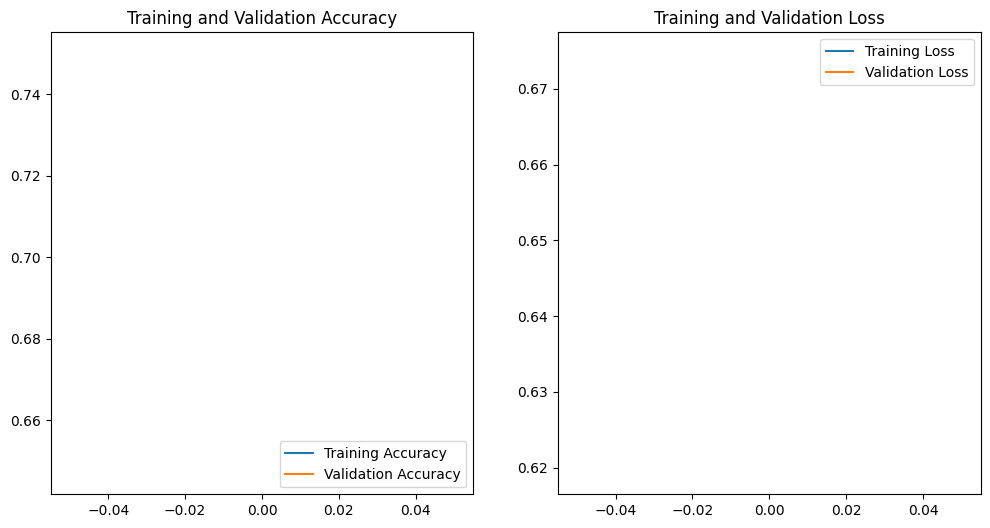

In [38]:
import matplotlib.pyplot as plt

# Extract training and validation metrics
acc = history.history['accuracy']
val_acc = history.history.get('val_accuracy', history.history.get('val_acc'))  # Handle 'val_accuracy' or 'val_acc'

loss = history.history['loss']
val_loss = history.history.get('val_loss', history.history.get('val_loss'))

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


First image to predict:


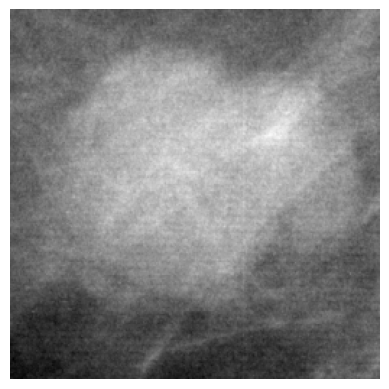

Actual label: benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted label: benign


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Make sure class_names = ['benign', 'malignant']
class_names = ['benign', 'malignant']

for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = int(labels_batch[0].numpy())  # fix here

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis('off')
    plt.show()

    print("Actual label:", class_names[first_label])

    batch_prediction = model.predict(images_batch)
    
    # If binary classifier, use threshold:
    predicted_label = 1 if batch_prediction[0][0] > 0.5 else 0
    
    print("Predicted label:", class_names[predicted_label])


In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 772ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


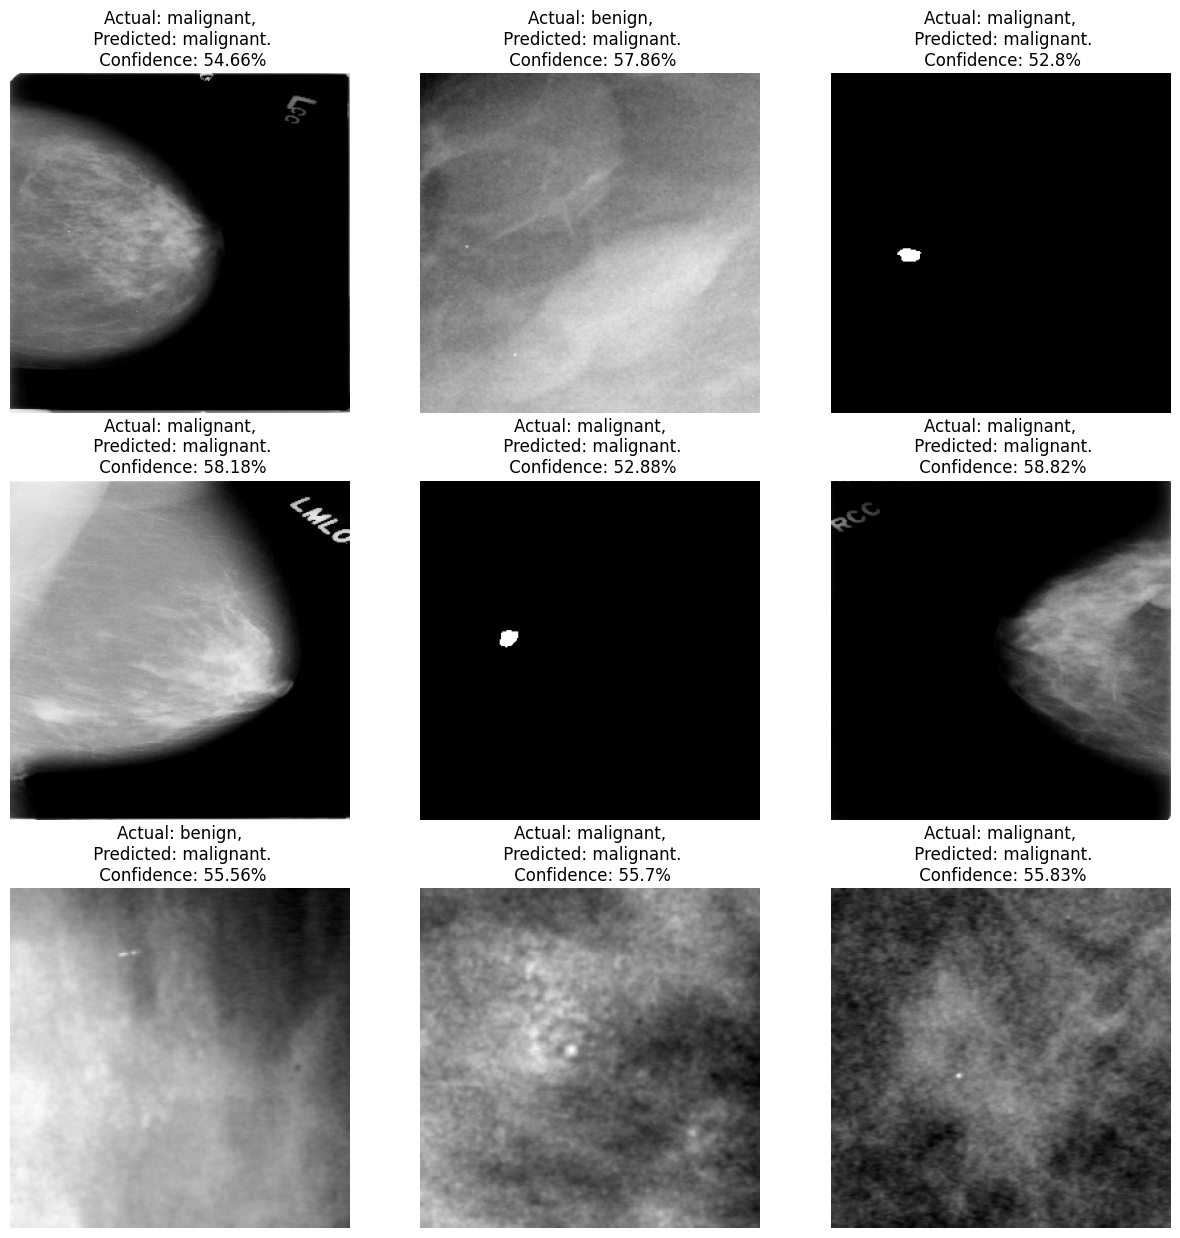

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [43]:
import os

# Set the directory where models will be saved
model_dir = "../models"
os.makedirs(model_dir, exist_ok=True)  # Create the folder if it doesn't exist

# Get list of model files with numeric names and extract version numbers
existing_versions = [int(f.split('.')[0]) for f in os.listdir(model_dir) if f.split('.')[0].isdigit()]
model_version = max(existing_versions + [0]) + 1  # Determine next version number

# Save model with proper .keras extension
model_path = os.path.join(model_dir, f"{model_version}.keras")
model.save(model_path)

print(f"Model saved to: {model_path}")


Model saved to: ../models\4.keras


In [46]:
# Save the model as a .keras file
model.save("breast_cancer_model.keras")


In [47]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 🔹 Load the saved Keras model
try:
    model = load_model("breast_cancer_model.keras")  # Path to your saved model
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# 🔹 Setup test data directory
test_dir = r"C:/Users/Timothy/archive (3)"  # Ensure this folder contains subfolders per class

# 🔹 Prepare the test image generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
input_shape = model.input_shape[1:3]  # (height, width)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 🎯 True labels
y_true = test_generator.classes

# 🤖 Model prediction
y_pred_probs = model.predict(test_generator, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)

# 🧮 Accuracy and F1 Score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ Weighted F1 Score: {f1:.4f}\n")

# 📊 Full classification report with zero_division=1 to avoid undefined metric warnings
labels = list(test_generator.class_indices.keys())
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels, zero_division=1))

# Confusion Matrix Plot
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

# Suggestions for training with class weights
# If you are retraining the model, consider using class weights:
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
# model.fit(train_generator, class_weight=class_weights, ...)


Found 1312 images belonging to 1 classes.

✅ Accuracy: 0.0000
✅ Weighted F1 Score: 0.0000

📋 Classification Report:


ValueError: Number of classes, 2, does not match size of target_names, 1. Try specifying the labels parameter

First image to predict:


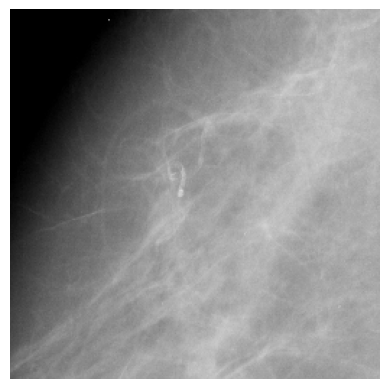

Actual label: benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step
Predicted label: benign


In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define the class names (must match your dataset)
class_names = ['benign', 'malignant']

# Show one image from the test dataset
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = int(labels_batch[0].numpy())  # Ensure it's an integer

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis('off')
    plt.show()

    print("Actual label:", class_names[first_label])  # Safe index now

    # Predict all images in the batch
    batch_prediction = model.predict(images_batch)

    # Handle binary classification (sigmoid output)
    predicted_label = int(batch_prediction[0][0] > 0.5)

    print("Predicted label:", class_names[predicted_label])



In [49]:
from sklearn.metrics import classification_report

# Assuming you collected predictions and true labels:
# y_true = [0, 1, 0, 1, ...]
# y_pred = [0, 0, 1, 1, ...]

# Make sure both are int arrays
y_true = np.array(y_true).astype(int)
y_pred = np.array(y_pred).astype(int)

# Must have two class names for binary classification
class_names = ['benign', 'malignant']

print(classification_report(y_true, y_pred, target_names=class_names, labels=[0, 1]))


              precision    recall  f1-score   support

      benign       0.00      0.00      0.00    1312.0
   malignant       0.00      0.00      0.00       0.0

    accuracy                           0.00    1312.0
   macro avg       0.00      0.00      0.00    1312.0
weighted avg       0.00      0.00      0.00    1312.0



C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [50]:
import numpy as np

# For test set
benign_count = 0
malignant_count = 0

for _, labels in test_ds:
    labels_np = labels.numpy().astype(int)
    benign_count += np.sum(labels_np == 0)
    malignant_count += np.sum(labels_np == 1)

print(f"Benign: {benign_count}, Malignant: {malignant_count}")


Benign: 424, Malignant: 376


In [53]:
import numpy as np
from sklearn.metrics import classification_report

y_true = []
y_pred = []

for images_batch, labels_batch in test_ds:
    # Predict the entire batch
    preds = model.predict(images_batch)

    # Convert sigmoid outputs to binary labels
    preds_binary = (preds > 0.5).astype(int).flatten()

    # Add predictions and true labels
    y_pred.extend(preds_binary.tolist())
    y_true.extend(labels_batch.numpy().astype(int).tolist())

# Sanity check
print(f"Total predictions: {len(y_pred)}, Total labels: {len(y_true)}")

# Final evaluation
class_names = ['benign', 'malignant']
print(classification_report(y_true, y_pred, target_names=class_names, labels=[0, 1]))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
Total predictions: 2400, 

ValueError: Found input variables with inconsistent numbers of samples: [800, 2400]

In [54]:
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the class names
class_names = ['benign', 'malignant']

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Iterate over the entire test dataset
for images_batch, labels_batch in test_ds:
    # Predict the entire batch
    preds = model.predict(images_batch)

    # Convert sigmoid outputs to binary labels (0 or 1)
    preds_binary = (preds > 0.5).astype(int).flatten()

    # Append true labels and predictions to the lists
    y_true.extend(labels_batch.numpy().astype(int).tolist())
    y_pred.extend(preds_binary.tolist())

# Sanity check: Ensure the number of predictions and labels match
print(f"Total predictions: {len(y_pred)}")
print(f"Total true labels: {len(y_true)}")

# Print a sample of the true and predicted labels for inspection
print("Sample of true labels:", y_true[:10])
print("Sample of predicted labels:", y_pred[:10])

# Now evaluate the model using classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names, labels=[0, 1]))

# Optionally, if you want to show an image from the batch with its prediction:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = int(labels_batch[0].numpy())  # Convert label to integer

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis('off')
    plt.show()

    print("Actual label:", class_names[first_label])

    # Predict the first image
    first_pred = model.predict(images_batch[0:1])
    predicted_label = 1 if first_pred[0][0] > 0.5 else 0
    print("Predicted label:", class_names[predicted_label])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
Total predictions: 2400
T

ValueError: Found input variables with inconsistent numbers of samples: [800, 2400]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
Total predictions: 2400
T

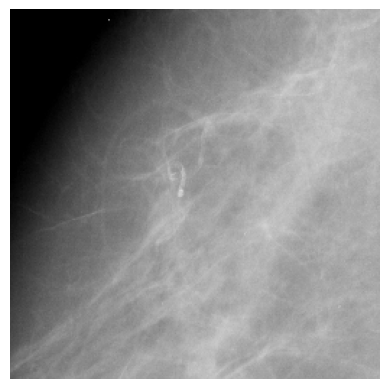

Actual label: benign
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Predicted label: benign


In [55]:
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the class names
class_names = ['benign', 'malignant']

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Iterate over the entire test dataset
for images_batch, labels_batch in test_ds:
    # Predict the entire batch
    preds = model.predict(images_batch)

    # Convert sigmoid outputs to binary labels (0 or 1)
    preds_binary = (preds > 0.5).astype(int).flatten()

    # Append true labels and predictions to the lists
    y_true.extend(labels_batch.numpy().astype(int).tolist())
    y_pred.extend(preds_binary.tolist())

# Ensure the number of predictions and labels match
print(f"Total predictions: {len(y_pred)}")
print(f"Total true labels: {len(y_true)}")

# If lengths match, print classification report
if len(y_pred) == len(y_true):
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names, labels=[0, 1]))
else:
    print("Mismatch in the number of predictions and true labels!")

# Optionally, if you want to show an image from the batch with its prediction:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = int(labels_batch[0].numpy())  # Convert label to integer

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis('off')
    plt.show()

    print("Actual label:", class_names[first_label])

    # Predict the first image
    first_pred = model.predict(images_batch[0:1])
    predicted_label = 1 if first_pred[0][0] > 0.5 else 0
    print("Predicted label:", class_names[predicted_label])



In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [800, 2400]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 512ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
Total predictions: 2400
T

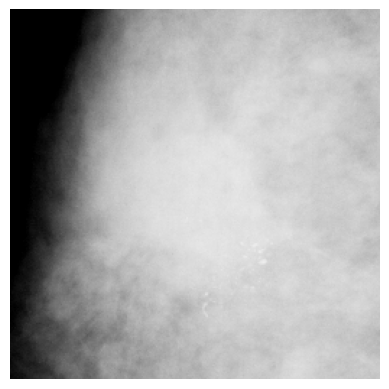

Actual label: malignant
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted label: benign


In [57]:
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Define the class names
class_names = ['benign', 'malignant']

# Initialize lists to store true labels and predictions
y_true = []
y_pred = []

# Iterate over the entire test dataset
for images_batch, labels_batch in test_ds:
    # Predict the entire batch
    preds = model.predict(images_batch)

    # Convert sigmoid outputs to binary labels (0 or 1)
    preds_binary = (preds > 0.5).astype(int).flatten()

    # Append true labels and predictions to the lists
    y_true.extend(labels_batch.numpy().astype(int).tolist())
    y_pred.extend(preds_binary.tolist())

# Ensure the number of predictions and labels match
print(f"Total predictions: {len(y_pred)}")
print(f"Total true labels: {len(y_true)}")

# If lengths match, print classification report
if len(y_pred) == len(y_true):
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=class_names, labels=[0, 1]))
else:
    print("Mismatch in the number of predictions and true labels!")

# Optionally, if you want to show an image from the batch with its prediction:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = int(labels_batch[0].numpy())  # Convert label to integer

    print("First image to predict:")
    plt.imshow(first_image)
    plt.axis('off')
    plt.show()

    print("Actual label:", class_names[first_label])

    # Predict the first image
    first_pred = model.predict(images_batch[0:1])
    predicted_label = 1 if first_pred[0][0] > 0.5 else 0
    print("Predicted label:", class_names[predicted_label])



In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


ValueError: Found input variables with inconsistent numbers of samples: [800, 2400]

In [59]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, classification_report

# Load the saved model
model = load_model("breast_cancer_model.keras")

# Load test data from directory
test_dir = "C:/Users/Timothy/archive (3)"   # Make sure this path is correct

# Preprocess test images
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Ground truth labels
y_true = test_generator.classes

# Make predictions
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# Compute F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"\nWeighted F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
class_labels = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=class_labels))

Found 1312 images belonging to 1 classes.


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 343ms/step

Weighted F1 Score: 0.0000

Classification Report:


ValueError: Number of classes, 2, does not match size of target_names, 1. Try specifying the labels parameter

Classification Report:
              precision    recall  f1-score   support

      benign       0.00      0.00      0.00    1312.0
   malignant       0.00      0.00      0.00       0.0

    accuracy                           0.00    1312.0
   macro avg       0.00      0.00      0.00    1312.0
weighted avg       0.00      0.00      0.00    1312.0



C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

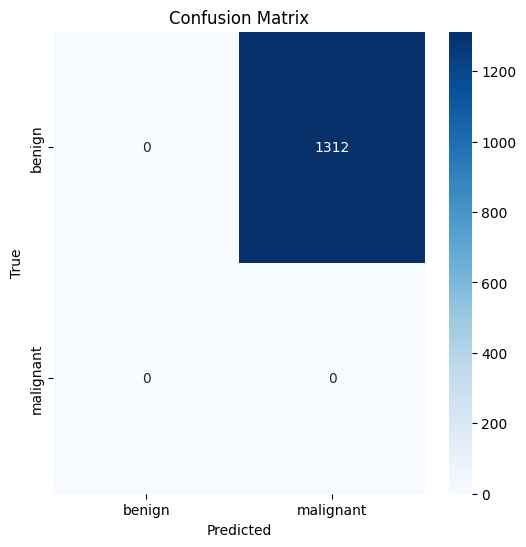

Confusion Matrix:
[[   0 1312]
 [   0    0]]


In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure class names match the predicted classes (benign and malignant)
class_names = ['benign', 'malignant']

# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print confusion matrix
print("Confusion Matrix:")
print(cm)


In [62]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, classification_report

# Load the saved model from the correct path
model_path = r"C:breast_cancer_model.keras"  # Update the path accordingly
model = load_model(model_path)

# Load test data from directory
test_dir = r"C:/Users/Timothy/archive (3)"  # Update the path accordingly

# Preprocess test images
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Resize images to match model input size (if necessary)
    batch_size=32,
    class_mode='categorical',  # Categorical as you're doing multi-class classification
    shuffle=False  # Ensure that the predictions align with the true labels
)

# Ground truth labels
y_true = test_generator.classes

# Make predictions
y_pred_probs = model.predict(test_generator, verbose=1)  # Get the probability predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Compute F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"\nWeighted F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
class_labels = list(test_generator.class_indices.keys())  # Get the class labels
print(classification_report(y_true, y_pred, target_names=class_labels))


Found 1312 images belonging to 1 classes.


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 15s 345ms/step

Weighted F1 Score: 0.0000

Classification Report:


ValueError: Number of classes, 2, does not match size of target_names, 1. Try specifying the labels parameter

In [63]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, classification_report

# Load the saved model from the correct path
model_path = r"C:breast_cancer_model.keras"  # Update the path accordingly
model = load_model(model_path)

# Load test data from directory
test_dir = r"C:/Users/Timothy/archive (3)"  # Update the path accordingly

# Preprocess test images
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),  # Resize images to match model input size (if necessary)
    batch_size=32,
    class_mode='categorical',  # Categorical as you're doing multi-class classification
    shuffle=False  # Ensure that the predictions align with the true labels
)

# Ground truth labels
y_true = test_generator.classes

# Make predictions
y_pred_probs = model.predict(test_generator, verbose=1)  # Get the probability predictions
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Compute F1 Score
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"\nWeighted F1 Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")

# Make sure you correctly get the class names
class_labels = list(test_generator.class_indices.keys())  # Get the class labels

# Check if the number of class labels matches the number of classes
if len(class_labels) == len(np.unique(y_true)):
    print(classification_report(y_true, y_pred, target_names=class_labels))
else:
    print(f"Number of classes in the target names: {len(class_labels)}, Number of unique labels in predictions: {len(np.unique(y_true))}")
    print("Possible mismatch, check the model or the test data directory.")


Found 1312 images belonging to 1 classes.


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 268ms/step

Weighted F1 Score: 0.0000

Classification Report:


ValueError: Number of classes, 2, does not match size of target_names, 1. Try specifying the labels parameter

In [64]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, accuracy_score, classification_report

# 🔹 Load the saved Keras model
model = load_model("breast_cancer_model.keras")  # Path to your saved model

# 🔹 Setup test data directory
test_dir = "C:/Users/Timothy/archive (3)"  # Ensure this folder contains subfolders per class

# 🔹 Prepare the test image generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),       # Use your model’s input size
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# 🎯 True labels
y_true = test_generator.classes

# 🤖 Model prediction
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# 🧮 Accuracy and F1 Score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ Weighted F1 Score: {f1:.4f}\n")

# 📊 Full classification report
labels = list(test_generator.class_indices.keys())
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

Found 1312 images belonging to 1 classes.


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 258ms/step

✅ Accuracy: 0.0000
✅ Weighted F1 Score: 0.0000

📋 Classification Report:


ValueError: Number of classes, 2, does not match size of target_names, 1. Try specifying the labels parameter

In [65]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, accuracy_score, classification_report

# 🔹 Load the saved Keras model
model = load_model("breast_cancer_model.keras")  # Path to your saved model

# 🔹 Setup test data directory
test_dir = "C:/Users/Timothy/archive (3)"  # Ensure this folder contains subfolders per class

# 🔹 Prepare the test image generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),       # Use your model’s input size
    batch_size=32,
    class_mode='binary',          # 'binary' for binary classification (benign vs malignant)
    shuffle=False
)

# 🎯 True labels
y_true = test_generator.classes

# 🤖 Model prediction
y_pred_probs = model.predict(test_generator, verbose=1)  # Predict the probabilities

# Convert probabilities to class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)  # Threshold at 0.5 for binary classification

# 🧮 Accuracy and F1 Score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ Weighted F1 Score: {f1:.4f}\n")

# 📊 Full classification report
# Ensure class names are correct for binary classification
labels = ['benign', 'malignant']
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))



Found 1312 images belonging to 1 classes.


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 284ms/step


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [66]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, accuracy_score, classification_report

# 🔹 Load the saved Keras model
model = load_model("breast_cancer_model.keras")  # Path to your saved model

# 🔹 Setup test data directory
test_dir = "C:/Users/Timothy/archive (3)"  # Ensure this folder contains subfolders per class

# 🔹 Prepare the test image generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),       # Use your model’s input size
    batch_size=32,
    class_mode='binary',          # 'binary' for binary classification (benign vs malignant)
    shuffle=False
)

# 🎯 True labels
y_true = test_generator.classes

# 🤖 Model prediction
y_pred_probs = model.predict(test_generator, verbose=1)  # Predict the probabilities

# If it's a binary classification, the model should output a single probability
# Apply a threshold of 0.5 to convert to binary class labels (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)  # Threshold at 0.5 for binary classification

# 🧮 Accuracy and F1 Score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ Weighted F1 Score: {f1:.4f}\n")

# 📊 Full classification report
labels = ['benign', 'malignant']  # Set labels for binary classification
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))


Found 1312 images belonging to 1 classes.


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 269ms/step


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [67]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, accuracy_score, classification_report

# 🔹 Load the saved Keras model
model = load_model("breast_cancer_model.keras")  # Path to your saved model

# 🔹 Setup test data directory
test_dir = "C:/Users/Timothy/archive (3)"  # Ensure this folder contains subfolders per class

# 🔹 Prepare the test image generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),       # Use your model’s input size
    batch_size=32,
    class_mode='binary',          # 'binary' for binary classification (benign vs malignant)
    shuffle=False
)

# 🎯 True labels
y_true = test_generator.classes

# 🤖 Model prediction
y_pred_probs = model.predict(test_generator, verbose=1)  # Predict the probabilities

# Check if model uses sigmoid (binary classification)
if y_pred_probs.shape[1] == 1:  # Sigmoid output (1 output neuron)
    y_pred = (y_pred_probs > 0.5).astype(int)  # Threshold at 0.5 for binary classification
else:  # Softmax output (2 output neurons)
    y_pred = np.argmax(y_pred_probs, axis=1)  # Pick the class with the highest probability

# 🧮 Accuracy and F1 Score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ Weighted F1 Score: {f1:.4f}\n")

# 📊 Full classification report
labels = ['benign', 'malignant']  # Set labels for binary classification
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))


Found 1312 images belonging to 1 classes.


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 272ms/step

✅ Accuracy: 0.0000
✅ Weighted F1 Score: 0.0000

📋 Classification Report:
              precision    recall  f1-score   support

      benign       0.00      0.00      0.00    1312.0
   malignant       0.00      0.00      0.00       0.0

    accuracy                           0.00    1312.0
   macro avg       0.00      0.00      0.00    1312.0
weighted avg       0.00      0.00      0.00    1312.0



C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

In [68]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, accuracy_score, classification_report
import random
import matplotlib.pyplot as plt

# 🔹 Load the saved Keras model
model = load_model("breast_cancer_model.keras")  # Path to your saved model

# 🔹 Setup test data directory
test_dir = "C:/Users/Timothy/archive (3)"  # Ensure this folder contains subfolders per class (benign and malignant)

# 🔹 Prepare the test image generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),       # Use your model’s input size (check your model's expected input size)
    batch_size=32,
    class_mode='binary',         # Since it's binary classification, use 'binary'
    shuffle=False
)

# 🎯 True labels
y_true = test_generator.classes

# 🤖 Model prediction
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# 🧮 Accuracy and F1 Score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ Weighted F1 Score: {f1:.4f}\n")

# 📊 Full classification report
labels = list(test_generator.class_indices.keys())
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

# 🔍 Debugging - Check predictions for a few images:
for i in range(5):  # Print the first 5 predictions and actual labels
    print(f"Predicted probability: {y_pred_probs[i]}")
    print(f"Predicted class: {y_pred[i]} (Actual class: {y_true[i]})")

# 🔍 Check the shape of predictions (for debugging)
print(f"Shape of predicted probabilities: {y_pred_probs.shape}")

# 🔍 Inspect a random test image and make a single prediction
random_index = random.randint(0, len(test_generator) - 1)
test_image, label = test_generator[random_index]
plt.imshow(test_image)
plt.title(f"Label: {label}")
plt.show()

# Make prediction on this single image
single_pred = model.predict(np.expand_dims(test_image, axis=0))
print(f"Single prediction: {single_pred}")

# If the model uses 'sigmoid' activation, adjust the prediction to either 0 or 1
if model.output_shape[1] == 1:  # Single output node for binary classification
    single_pred_class = 1 if single_pred > 0.5 else 0
    print(f"Single predicted class: {single_pred_class}")
else:
    single_pred_class = np.argmax(single_pred)
    print(f"Single predicted class: {single_pred_class}")


Found 1312 images belonging to 1 classes.


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 270ms/step

✅ Accuracy: 0.0000
✅ Weighted F1 Score: 0.0000

📋 Classification Report:


ValueError: Number of classes, 2, does not match size of target_names, 1. Try specifying the labels parameter

Found 1312 images belonging to 1 classes.


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 276ms/step

✅ Accuracy: 0.0000
✅ Weighted F1 Score: 0.0000

📋 Classification Report:
              precision    recall  f1-score   support

      benign       0.00      0.00      0.00    1312.0
   malignant       0.00      0.00      0.00       0.0

    accuracy                           0.00    1312.0
   macro avg       0.00      0.00      0.00    1312.0
weighted avg       0.00      0.00      0.00    1312.0

Predicted probability: [0.45692042 0.54232585 0.00075373]
Predicted class: 1 (Actual class: 0)
Predicted probability: [0.45624173 0.5430608  0.00069742]
Predicted class: 1 (Actual class: 0)
Predicted probability: [0.45654023 0.5427398  0.0007199 ]
Predicted class: 1 (Actual class: 0)
Predicted probability: [0.45618105 0.5431204  0.00069859]
Predicted class: 1 (Actual class: 0)
Predicted probability: [0.45652354 0.54276377 0.00071274]
Predicted class: 1 (Actual class: 0)
Shape of predicted probabilities: (1312, 3)


C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Timothy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modi

TypeError: Invalid shape (32, 128, 128, 3) for image data

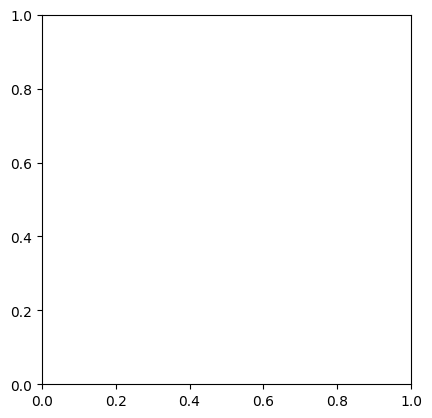

In [69]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, accuracy_score, classification_report
import random
import matplotlib.pyplot as plt

# 🔹 Load the saved Keras model
model = load_model("breast_cancer_model.keras")  # Path to your saved model

# 🔹 Setup test data directory
test_dir = "C:/Users/Timothy/archive (3)"  # Ensure this folder contains subfolders per class (benign and malignant)

# 🔹 Prepare the test image generator
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),       # Use your model’s input size (check your model's expected input size)
    batch_size=32,
    class_mode='binary',         # Since it's binary classification, use 'binary'
    shuffle=False
)

# 🎯 True labels
y_true = test_generator.classes

# 🤖 Model prediction
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

# 🧮 Accuracy and F1 Score
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"\n✅ Accuracy: {accuracy:.4f}")
print(f"✅ Weighted F1 Score: {f1:.4f}\n")

# 📊 Full classification report
labels = ['benign', 'malignant']  # Specify the correct class labels here
print("📋 Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))

# 🔍 Debugging - Check predictions for a few images:
for i in range(5):  # Print the first 5 predictions and actual labels
    print(f"Predicted probability: {y_pred_probs[i]}")
    print(f"Predicted class: {y_pred[i]} (Actual class: {y_true[i]})")

# 🔍 Check the shape of predictions (for debugging)
print(f"Shape of predicted probabilities: {y_pred_probs.shape}")

# 🔍 Inspect a random test image and make a single prediction
random_index = random.randint(0, len(test_generator) - 1)
test_image, label = test_generator[random_index]
plt.imshow(test_image)
plt.title(f"Label: {label}")
plt.show()

# Make prediction on this single image
single_pred = model.predict(np.expand_dims(test_image, axis=0))
print(f"Single prediction: {single_pred}")

# If the model uses 'sigmoid' activation, adjust the prediction to either 0 or 1
if model.output_shape[1] == 1:  # Single output node for binary classification
    single_pred_class = 1 if single_pred > 0.5 else 0
    print(f"Single predicted class: {single_pred_class}")
else:
    single_pred_class = np.argmax(single_pred)
    print(f"Single predicted class: {single_pred_class}")

